In [1]:
#step 1 : import the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the data
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
#check the shape of the data
df.shape

(10683, 11)

In [5]:
#check the null values in the data
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
#convert the data of journey date into daytime format
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y')
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [7]:
#exteract the day,month and year from the date of journey
df['Day']=df['Date_of_Journey'].dt.day
df['Month']=df['Date_of_Journey'].dt.month
df['Year']=df['Date_of_Journey'].dt.year

In [8]:
#drop the date of journey column
df.drop('Date_of_Journey',axis=1,inplace=True)

In [9]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [10]:
#extract the dep_hour and dep_min from the departure time
df['Dep_hour']=df['Dep_Time'].str.split(':').str[0].astype(int)
df['Dep_min']=df['Dep_Time'].str.split(':').str[1].astype(int)

In [11]:
#extract the arr_hour and arr_min from the arrival time
df['Arr_hour']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0].astype(int)
df['Arr_min']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1].astype(int)

In [12]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [13]:
#drop the arrival time column
df.drop('Arrival_Time',axis=1,inplace=True)

In [14]:
#drop the departure time column
df.drop('Dep_Time',axis=1,inplace=True)

In [15]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [16]:
#clean the total stops column
#check the value counts of the total stops column
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [17]:
#non stop value convert into 0 stop value
df['Total_Stops']=df['Total_Stops'].replace('non-stop','0 stop')

In [18]:
#value counts of total stops column after cleaning
df['Total_Stops'].value_counts()

Total_Stops
1 stop     5625
0 stop     3491
2 stops    1520
3 stops      45
4 stops       1
Name: count, dtype: int64

In [19]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0 stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [20]:
# remove the stop word from the total stops column
stops = df['Total_Stops'].astype(str).str.extract(r"(\d+)")
df['Total_Stops'] = stops[0].fillna(0).astype(int)

In [21]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,2019,16,50,21,35


In [22]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [23]:
# extract the route information into multiple columns
df['route1']=df['Route'].str.split('→').str[0].str.strip()
df['route2']=df['Route'].str.split('→').str[1].str.strip()
df['route3']=df['Route'].str.split('→').str[2].str.strip()
df['route4']=df['Route'].str.split('→').str[3].str.strip()
df['route5']=df['Route'].str.split('→').str[4].str.strip()

In [24]:
#drop the route column
df.drop('Route',axis=1,inplace=True)

In [25]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arr_hour,Arr_min,route1,route2,route3,route4,route5
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,2019,22,20,1,10,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,2019,5,50,13,15,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,2019,9,25,4,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,5h 25m,1,No info,6218,12,5,2019,18,5,23,30,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,4h 45m,1,No info,13302,1,3,2019,16,50,21,35,BLR,NAG,DEL,NaN,NaN


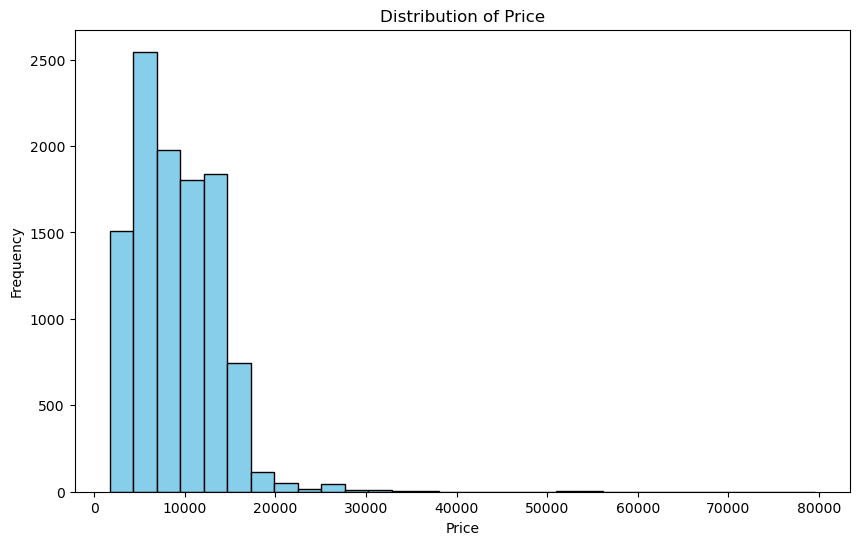

In [26]:
#plot the distribution of the price column
plt.figure(figsize=(10,6))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

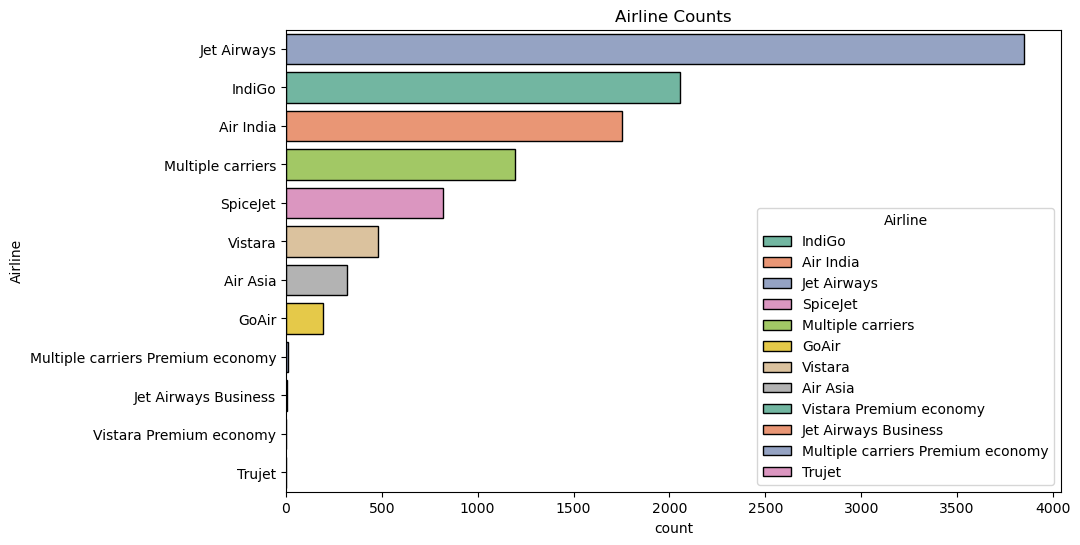

In [27]:
# plot the airline counts
plt.figure(figsize=(10, 6))
# make horizontal bar plot of airline counts
sns.countplot(y=df['Airline'], order=df['Airline'].value_counts().index,hue=df['Airline'],edgecolor='black',palette='Set2',dodge=False,legend=True)
plt.title('Airline Counts')
plt.show()

In [28]:
# all categorical columns  convert into label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [29]:
#chech central tendency of the price column
print('Mean:', df['Price'].mean()) 
print('Median:', df['Price'].median())
print('Mode:', df['Price'].mode()[0])

Mean: 9087.064120565385
Median: 8372.0
Mode: 10262


In [30]:
#convert the price column into log transformation
df['Price'] = np.log(df['Price'])
df.head()   

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arr_hour,Arr_min,route1,route2,route3,route4,route5
0,3,0,5,240,0,8,8.267962,24,3,2019,22,20,1,10,0,10,26,11,5
1,1,3,0,336,2,8,8.944028,1,5,2019,5,50,13,15,2,20,1,3,5
2,4,2,1,106,2,8,9.538348,9,6,2019,9,25,4,25,3,27,4,5,5
3,3,3,0,311,1,8,8.735204,12,5,2019,18,5,23,30,2,29,3,11,5
4,3,0,5,303,1,8,9.495670,1,3,2019,16,50,21,35,0,29,7,11,5


In [31]:
#lineaer regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score
x=df.drop('Price',axis=1)
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()    
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2)

0.5977067865427395


In [32]:
#decision tree regression model
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train,y_train)
y_pred_dt=dt_model.predict(x_test)
r2_dt=r2_score(y_test,y_pred_dt)
print(r2_dt)

0.9052867808918451


In [33]:
#k-nearest neighbor regression model
from sklearn.neighbors import KNeighborsRegressor
knn_model=KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train,y_train)
y_pred_knn=knn_model.predict(x_test)
r2_knn=r2_score(y_test,y_pred_knn)
print(r2_knn)

0.7304318612863039


In [34]:
#random forest regression model
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test)
r2_rf=r2_score(y_test,y_pred_rf)
print(r2_rf)

0.9436903847997775


In [35]:
# support vector regression model
from sklearn.svm import SVR
svr_model=SVR(kernel='rbf')
svr_model.fit(x_train,y_train)
y_pred_svr=svr_model.predict(x_test)
r2_svr=r2_score(y_test,y_pred_svr)
print(r2_svr)

0.3724184123650779


In [36]:
# make a dataframe to compare the performance of all the models
from sklearn.metrics import mean_absolute_error


model_comparison = pd.DataFrame({'Model': ['Linear Regression', 'Decision Tree Regressor', 'SVR', 'KNN Regressor', 'Random Forest Regressor'],
                                 'MAE': [mean_absolute_error(y_test, y_pred), mean_absolute_error(y_test, y_pred_dt), mean_absolute_error(y_test, y_pred_svr), mean_absolute_error(y_test, y_pred_knn), mean_absolute_error(y_test, y_pred_rf)],
                                 'MSE': [mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred_dt), mean_squared_error(y_test, y_pred_svr), mean_squared_error(y_test, y_pred_knn), mean_squared_error(y_test, y_pred_rf)],
                                 'R2 Score': [r2_score(y_test, y_pred), r2_score(y_test, y_pred_dt), r2_score(y_test, y_pred_svr), r2_score(y_test, y_pred_knn), r2_score(y_test, y_pred_rf)]})
model_comparison.sort_values(by='R2 Score', ascending=False)    

,Model,MAE,MSE,R2 Score
4,Random Forest Regressor,0.066724,0.014918,0.943690
1,Decision Tree Regressor,0.073457,0.025093,0.905287
3,KNN Regressor,0.182736,0.071418,0.730432
0,Linear Regression,0.260459,0.106582,0.597707
2,SVR,0.329083,0.166268,0.372418


In [37]:
#save the best model
import joblib   
joblib.dump(rf_model, 'flight_price_model.pkl')   


['flight_price_model.pkl']